# Predicting the formula for a Next Billion-Dollar Movie
<img src="images/Bishamon.jpg" alt="Drawing" style="width: 200px;"/>

##### So this is my thesis work: "Making an ML model to predict in cinematography". I already scrapped a data from the Wiki pages (top 10 films by gross from 1950 to 2025 years). Our main tasks is clean the data, provide analysis, make a ML classificator, make an API and deploy it to HTML page. Task is complited when the model can say what our film needs to get a Billion $ Gross
----------

## What are we exploring today?
- **Top directors and actors**: Find the most frequent directors and actors.
- **Budget vs. Box Office**: Identify patterns between film budgets and earnings.
- **Genre-based performance**: Genre impact on revenue.
----------

### Objective
##### Develop a machine learning model that predicts whether a new movie has the potential to earn over $1 billion at the global box office. 
------

##### Tasks
- <s>Loading and first look at the data
    - Importing relevant libraries
    - Downloading dataset
    - Checking overall info
    - Looking for missing, wrong and bad values
- Data Cleaning
    - Handle missing values
    - Convert date fields
    - Normalize financial data
    - Split date
    - Split multi-value fields
- Analysis and visualization
    - Top directors and actors
    - Budget vs. Box Office
    - Genre-based performance</s>
- Processing and preparation data for modeling
    - Encoding for categorical values
    - Choosing a variables for the model, and making new
    - Normalization values
    - Balancing classes if they are not
- Classification creation to predict sleep disorder
    - Train/Test split
    - Trying different algorithms
    - Model scoring
- Optimization and choosing hyperparameters
    - Optimizing
    - Model productive scoring
- Conclusion
    - Making confusion matrix
    - Looking for feature importance
    - Conclusion: What Features affect?
-------

## Importing the libraries

In [94]:
# to work with Data
import pandas as pd
import numpy as np
import re

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

-----
## Loading and look at the data

In [95]:
df_original = pd.read_csv('./data/movies.csv')

In [96]:
df = df_original.copy()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  1204 non-null   bool   
 1   backdrop_path          1194 non-null   object 
 2   genre_ids              1204 non-null   object 
 3   id                     1204 non-null   int64  
 4   original_language      1204 non-null   object 
 5   original_title         1204 non-null   object 
 6   overview               1200 non-null   object 
 7   popularity             1204 non-null   float64
 8   poster_path            1203 non-null   object 
 9   release_date           1202 non-null   object 
 10  title                  1204 non-null   object 
 11  video                  1204 non-null   bool   
 12  vote_average           1204 non-null   float64
 13  vote_count             1204 non-null   int64  
 14  belongs_to_collection  521 non-null    object 
 15  budg

In [98]:
df

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,...,origin_country,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,actors,director
0,False,/9nhjGaFLKtddDPtPaX5EmKqsWdH.jpg,"[10749, 878, 53]",950396,en,The Gorge,Two highly trained operatives grow close from ...,2192.325,/7iMBZzVZtG0oBug4TfqDb9ZxAOa.jpg,2025-02-13,...,['US'],"[{'id': 82819, 'logo_path': '/gXfFl9pRPaoaq14j...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,127,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The world's most dangerous secret lies between...,"['Miles Teller', 'Anya Taylor-Joy', 'Sigourney...",Scott Derrickson
1,False,/gFFqWsjLjRfipKzlzaYPD097FNC.jpg,"[28, 53, 80]",1126166,en,Flight Risk,A U.S. Marshal escorts a government witness to...,2084.876,/4cR3hImKd78dSs652PAkSAyJ5Cx.jpg,2025-01-22,...,['US'],"[{'id': 1302, 'logo_path': '/zC3b70ixHh89qJIik...","[{'iso_3166_1': 'US', 'name': 'United States o...",40420193,91,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Y'all need a pilot?,"['Mark Wahlberg', 'Michelle Dockery', 'Topher ...",Mel Gibson
2,False,/kEYWal656zP5Q2Tohm91aw6orlT.jpg,"[18, 35, 10749]",1064213,en,Anora,A young sex worker from Brooklyn gets her chan...,1634.892,/qh8m8Udz0sCa5gy9VaqfHPh0yPM.jpg,2024-10-14,...,['US'],"[{'id': 88152, 'logo_path': '/zm1yRe17jzOgEzXr...","[{'iso_3166_1': 'US', 'name': 'United States o...",40989193,139,"[{'english_name': 'Armenian', 'iso_639_1': 'hy...",Released,Love is a hustle.,"['Mikey Madison', 'Mark Eydelshteyn', 'Yura Bo...",Sean Baker
3,False,/zo8CIjJ2nfNOevqNajwMRO6Hwka.jpg,"[16, 12, 10751, 35]",1241982,en,Moana 2,After receiving an unexpected call from her wa...,1464.109,/aLVkiINlIeCkcZIzb7XHzPYgO6L.jpg,2024-11-21,...,['US'],"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1044396565,99,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ocean is calling them back.,"['Auliʻi Cravalho', 'Dwayne Johnson', 'Hualāla...",David G. Derrick Jr.
4,False,/1w8kutrRucTd3wlYyu5QlUDMiG1.jpg,"[12, 10751, 16]",762509,en,Mufasa: The Lion King,"Mufasa, a cub lost and alone, meets a sympathe...",1503.471,/lurEK87kukWNaHd0zYnsi3yzJrs.jpg,2024-12-18,...,['US'],"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...","[{'iso_3166_1': 'US', 'name': 'United States o...",700197856,118,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The story of an orphan who would be king.,"['Aaron Pierre', 'Kelvin Harrison, Jr.', 'Tiff...",Barry Jenkins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,False,/5yGgVqsk3v44jfGVuFWIDxOExIF.jpg,"[18, 14, 10749]",399055,en,The Shape of Water,"An other-worldly story, set against the backdr...",33.989,/9zfwPffUXpBrEP26yp0q1ckXDcj.jpg,2017-12-01,...,['US'],"[{'id': 101082, 'logo_path': '/zjAYU6sUmYaeFeJ...","[{'iso_3166_1': 'US', 'name': 'United States o...",195300000,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A Fairy Tale for Troubled Times,"['Sally Hawkins', 'Michael Shannon', 'Richard ...",Guillermo del Toro
1200,False,/3pKIcv6KhUE35jsKnv3MylQ3OT2.jpg,"[80, 28, 878]",198184,en,Chappie,Every child comes into the world full of promi...,43.975,/6zmKkfSvo4tBtvGSjn5PofWIvP9.jpg,2015-03-04,...,['US'],"[{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLu...","[{'iso_3166_1': 'US', 'name': 'United States o...",104399548,120,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,I am consciousness. I am alive. I am Chappie.,"['Sharlto Copley', 'Dev Patel', 'Hugh Jackman'...",Neill Blomkamp
1201,False,/1Ds7xy7ILo8u2WWxdnkJth1jQVT.jpg,"[28, 12, 35]",752623,en,The Lost City,Reclusive author Loretta Sage writes about exo...,43.965,/rnheO8cFvCYcmZsDrBoabJbKLFE.jpg,2022-03-24,...,['US'],"[{'id': 4258, 'logo_path': None, 'name': 'Fort...","[{'iso_3166_1': 'US', 'name': 'United States o...",192907684,112,"[{'english_name': 'English', 'is

In [99]:
df.isnull().sum().sort_values(ascending=False)

belongs_to_collection    683
homepage                 397
tagline                  235
imdb_id                   19
backdrop_path             10
director                   8
overview                   4
release_date               2
poster_path                1
original_language          0
id                         0
genre_ids                  0
adult                      0
vote_average               0
video                      0
title                      0
popularity                 0
original_title             0
budget                     0
genres                     0
vote_count                 0
production_companies       0
origin_country             0
production_countries       0
revenue                    0
spoken_languages           0
runtime                    0
status                     0
actors                     0
dtype: int64

-----
## Data cleaning

### Dealing with missing values

In [100]:
df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,...,origin_country,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,actors,director
0,False,/9nhjGaFLKtddDPtPaX5EmKqsWdH.jpg,"[10749, 878, 53]",950396,en,The Gorge,Two highly trained operatives grow close from ...,2192.325,/7iMBZzVZtG0oBug4TfqDb9ZxAOa.jpg,2025-02-13,...,['US'],"[{'id': 82819, 'logo_path': '/gXfFl9pRPaoaq14j...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,127,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The world's most dangerous secret lies between...,"['Miles Teller', 'Anya Taylor-Joy', 'Sigourney...",Scott Derrickson
1,False,/gFFqWsjLjRfipKzlzaYPD097FNC.jpg,"[28, 53, 80]",1126166,en,Flight Risk,A U.S. Marshal escorts a government witness to...,2084.876,/4cR3hImKd78dSs652PAkSAyJ5Cx.jpg,2025-01-22,...,['US'],"[{'id': 1302, 'logo_path': '/zC3b70ixHh89qJIik...","[{'iso_3166_1': 'US', 'name': 'United States o...",40420193,91,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Y'all need a pilot?,"['Mark Wahlberg', 'Michelle Dockery', 'Topher ...",Mel Gibson
2,False,/kEYWal656zP5Q2Tohm91aw6orlT.jpg,"[18, 35, 10749]",1064213,en,Anora,A young sex worker from Brooklyn gets her chan...,1634.892,/qh8m8Udz0sCa5gy9VaqfHPh0yPM.jpg,2024-10-14,...,['US'],"[{'id': 88152, 'logo_path': '/zm1yRe17jzOgEzXr...","[{'iso_3166_1': 'US', 'name': 'United States o...",40989193,139,"[{'english_name': 'Armenian', 'iso_639_1': 'hy...",Released,Love is a hustle.,"['Mikey Madison', 'Mark Eydelshteyn', 'Yura Bo...",Sean Baker
3,False,/zo8CIjJ2nfNOevqNajwMRO6Hwka.jpg,"[16, 12, 10751, 35]",1241982,en,Moana 2,After receiving an unexpected call from her wa...,1464.109,/aLVkiINlIeCkcZIzb7XHzPYgO6L.jpg,2024-11-21,...,['US'],"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1044396565,99,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ocean is calling them back.,"['Auliʻi Cravalho', 'Dwayne Johnson', 'Hualāla...",David G. Derrick Jr.
4,False,/1w8kutrRucTd3wlYyu5QlUDMiG1.jpg,"[12, 10751, 16]",762509,en,Mufasa: The Lion King,"Mufasa, a cub lost and alone, meets a sympathe...",1503.471,/lurEK87kukWNaHd0zYnsi3yzJrs.jpg,2024-12-18,...,['US'],"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...","[{'iso_3166_1': 'US', 'name': 'United States o...",700197856,118,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The story of an orphan who would be king.,"['Aaron Pierre', 'Kelvin Harrison, Jr.', 'Tiff...",Barry Jenkins


In [101]:
df = df.drop(columns=['homepage', 'tagline'])

In [102]:
df['imdb_id'] = df['imdb_id'].fillna('')
df['backdrop_path'] = df['backdrop_path'].fillna('')
df['director'] = df['director'].fillna('Unknown')
df['overview'] = df['overview'].fillna('')
df['poster_path'] = df['poster_path'].fillna('')

In [103]:
df = df.dropna(subset=['release_date'])

In [104]:
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)

df['budget'] = df['budget'].fillna(df['budget'].median())
df['revenue'] = df['revenue'].fillna(df['revenue'].median())

In [105]:
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 1 if pd.notnull(x) else 0)

### Lists encrypting

In [106]:
df['genres'] = df['genres'].apply(lambda x: ', '.join([genre['name'] for genre in eval(x)]))

In [107]:
df['production_companies'] = df['production_companies'].apply(lambda x: ', '.join([company['name'] for company in eval(x)]))

In [108]:
df['production_countries'] = df['production_countries'].apply(lambda x: ', '.join([country['name'] for country in eval(x)]))

In [109]:
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: ', '.join([lang['english_name'] for lang in eval(x)]))

In [110]:
df['actor_1'] = df['actors'].apply(lambda x: eval(x)[0] if len(eval(x)) > 0 else np.nan)
df['actor_2'] = df['actors'].apply(lambda x: eval(x)[1] if len(eval(x)) > 1 else np.nan)
df['actor_3'] = df['actors'].apply(lambda x: eval(x)[2] if len(eval(x)) > 2 else np.nan)
df['actor_4'] = df['actors'].apply(lambda x: eval(x)[3] if len(eval(x)) > 3 else np.nan)
df['actor_5'] = df['actors'].apply(lambda x: eval(x)[4] if len(eval(x)) > 4 else np.nan)

In [111]:
df = df.drop(columns=['actors'])

In [112]:
df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,...,revenue,runtime,spoken_languages,status,director,actor_1,actor_2,actor_3,actor_4,actor_5
0,False,/9nhjGaFLKtddDPtPaX5EmKqsWdH.jpg,"[10749, 878, 53]",950396,en,The Gorge,Two highly trained operatives grow close from ...,2192.325,/7iMBZzVZtG0oBug4TfqDb9ZxAOa.jpg,2025-02-13,...,1.914845e+08,127,"English, Lithuanian",Released,Scott Derrickson,Miles Teller,Anya Taylor-Joy,Sigourney Weaver,Sope Dirisu,William Houston
1,False,/gFFqWsjLjRfipKzlzaYPD097FNC.jpg,"[28, 53, 80]",1126166,en,Flight Risk,A U.S. Marshal escorts a government witness to...,2084.876,/4cR3hImKd78dSs652PAkSAyJ5Cx.jpg,2025-01-22,...,4.042019e+07,91,English,Released,Mel Gibson,Mark Wahlberg,Michelle Dockery,Topher Grace,Leah Remini,Paul Ben-Victor
2,False,/kEYWal656zP5Q2Tohm91aw6orlT.jpg,"[18, 35, 10749]",1064213,en,Anora,A young sex worker from Brooklyn gets her chan...,1634.892,/qh8m8Udz0sCa5gy9VaqfHPh0yPM.jpg,2024-10-14,...,4.098919e+07,139,"Armenian, English, Russian",Released,Sean Baker,Mikey Madison,Mark Eydelshteyn,Yura Borisov,Karren Karagulian,Vache Tovmasyan
3,False,/zo8CIjJ2nfNOevqNajwMRO6Hwka.jpg,"[16, 12, 10751, 35]",1241982,en,Moana 2,After receiving an unexpected call from her wa...,1464.109,/aLVkiINlIeCkcZIzb7XHzPYgO6L.jpg,2024-11-21,...,1.044397e+09,99,"English, Italian",Released,David G. Derrick Jr.,Auliʻi Cravalho,Dwayne Johnson,Hualālai Chung,Rose Matafeo,David Fane
4,False,/1w8kutrRucTd3wlYyu5QlUDMiG1.jpg,"[12, 10751, 16]",762509,en,Mufasa: The Lion King,"Mufasa, a cub lost and alone, meets a sympathe...",1503.471,/lurEK87kukWNaHd0zYnsi3yzJrs.jpg,2024-12-18,...,7.001979e+08,118,English,Released,Barry Jenkins,Aaron Pierre,"Kelvin Harrison, Jr.",Tiffany Boone,Kagiso Lediga,Preston Nyman


In [113]:
columns_to_drop = [
    'adult', 'backdrop_path', 'genre_ids', 'original_title', 'video',
    'belongs_to_collection', 'imdb_id', 'origin_country', 'poster_path', 'spoken_languages', 'overview'
]

df = df.drop(columns=columns_to_drop)

df.head()

,id,original_language,popularity,release_date,title,vote_average,vote_count,budget,genres,production_companies,production_countries,revenue,runtime,status,director,actor_1,actor_2,actor_3,actor_4,actor_5
0,950396,en,2192.325,2025-02-13,The Gorge,7.766,1655,60000000.0,"Romance, Science Fiction, Thriller","Skydance Media, Crooked Highway, Apple Studios",United States of America,1.914845e+08,127,Released,Scott Derrickson,Miles Teller,Anya Taylor-Joy,Sigourney Weaver,Sope Dirisu,William Houston
1,1126166,en,2084.876,2025-01-22,Flight Risk,6.000,375,25000000.0,"Action, Thriller, Crime","Davis Entertainment, Icon Productions, Hammers...",United States of America,4.042019e+07,91,Released,Mel Gibson,Mark Wahlberg,Michelle Dockery,Topher Grace,Leah Remini,Paul Ben-Victor
2,1064213,en,1634.892,2024-10-14,Anora,7.095,1388,6000000.0,"Drama, Comedy, Romance","Cre Film, FilmNation Entertainment",United States of America,4.098919e+07,139,Released,Sean Baker,Mikey Madison,Mark Eydelshteyn,Yura Borisov,Karren Karagulian,Vache Tovmasyan
3,1241982,en,1464.109,2024-11-21,Moana 2,7.200,1773,150000000.0,"Animation, Adventure, Family, Comedy","Walt Disney Pictures, Walt Disney Animation St...","Canada, United States of America",1.044397e+09,99,Released,David G. Derrick Jr.,Auliʻi Cravalho,Dwayne Johnson,Hualālai Chung,Rose Matafeo,David Fane
4,762509,en,1503.471,2024-12-18,Mufasa: The Lion King,7.500,1534,200000000.0,"Adventure, Family, Animation",Walt Disney Pictures,United States of America,7.001979e+08,118,Released,Barry Jenkins,Aaron Pierre,"Kelvin Harrison, Jr.",Tiffany Boone,Kagiso Lediga,Preston Nyman


-----
### Analysis

Top Directors by Average Revenue

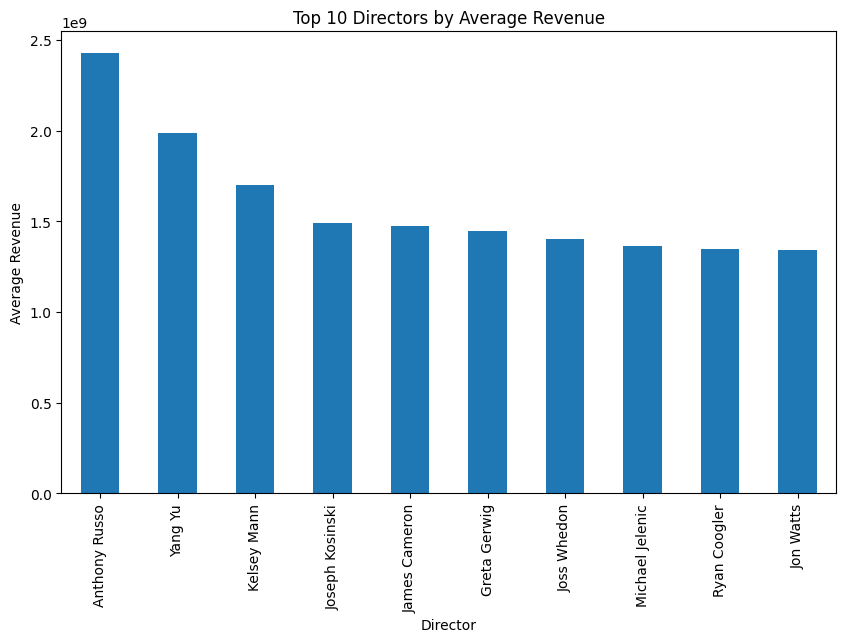

In [114]:
top_directors_by_revenue = df.groupby('director')['revenue'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

top_directors_by_revenue.plot(kind='bar')

plt.title('Top 10 Directors by Average Revenue')
plt.xlabel('Director')
plt.ylabel('Average Revenue')

plt.show()


Top Actors by Average Revenue

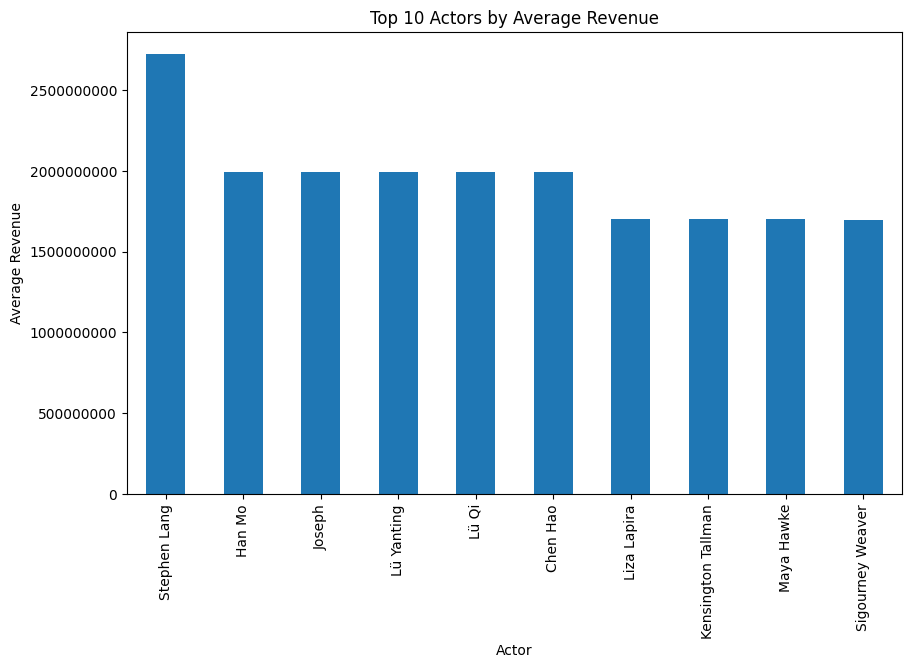

In [115]:
actors_revenue = pd.concat([
    df[['actor_1', 'revenue']].rename(columns={'actor_1': 'actor'}),
    df[['actor_2', 'revenue']].rename(columns={'actor_2': 'actor'}),
    df[['actor_3', 'revenue']].rename(columns={'actor_3': 'actor'}),
    df[['actor_4', 'revenue']].rename(columns={'actor_4': 'actor'}),
    df[['actor_5', 'revenue']].rename(columns={'actor_5': 'actor'})
])
top_actors_by_revenue = actors_revenue.groupby('actor')['revenue'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))

top_actors_by_revenue.plot(kind='bar',)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.title('Top 10 Actors by Average Revenue')
plt.xlabel('Actor')
plt.ylabel('Average Revenue')

plt.show()

Budget vs. Revenue

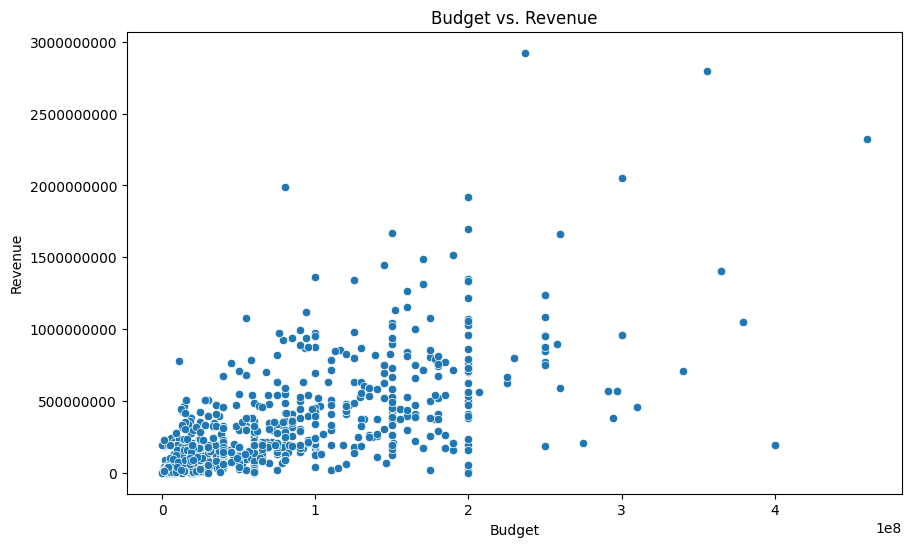

In [116]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='budget', y='revenue', data=df)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

plt.show()

Top Genres by Average Revenue


In [117]:
df['genres'] = df['genres'].str.split(', ')

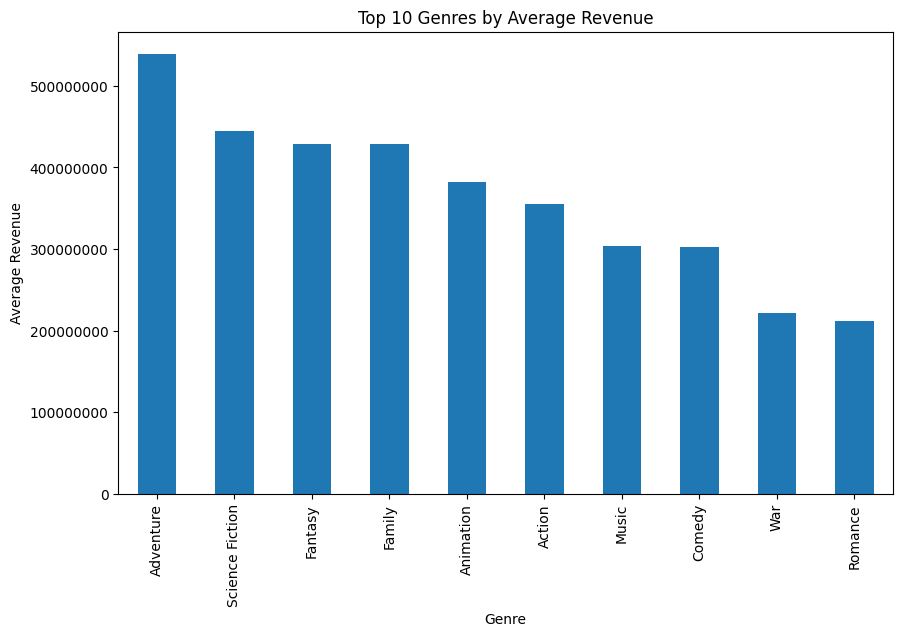

In [118]:
genres_revenue = df.explode('genres').groupby('genres')['revenue'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

genres_revenue.plot(kind='bar')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.title('Top 10 Genres by Average Revenue')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.show()


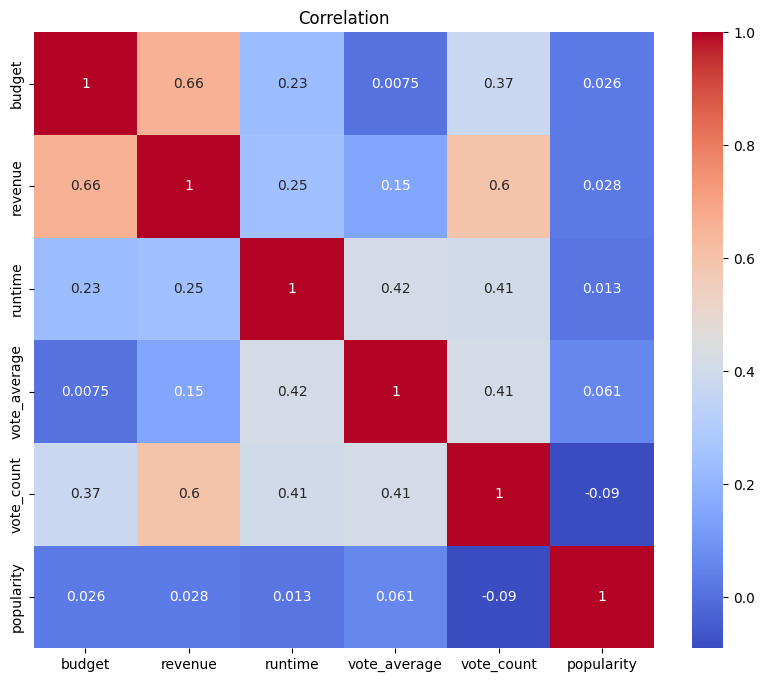

In [119]:
plt.figure(figsize=(10, 8))

sns.heatmap(df[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'popularity']].corr(), annot=True, cmap='coolwarm')

plt.title('Correlation')
plt.show()


----
### Processing and preparation data for modeling


Dealing with categorical

In [120]:
genres_expanded = df['genres'].str.get_dummies(sep=', ')
df = pd.concat([df, genres_expanded], axis=1)

In [121]:
df['director'] = df['director'].astype('category').cat.codes

In [122]:
for i in range(1, 6):
    df[f'actor_{i}'] = df[f'actor_{i}'].astype('category').cat.codes

Normalization

In [123]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['budget', 'runtime', 'vote_average', 'vote_count', 'popularity']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

Train/split test

In [124]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['revenue', 'release_date', 'title'])
y = df['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)